In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(
    r"../data/BindingDB_All.tsv",
    sep="\t",
    # nrows=1e4,
    usecols=["UniProt (SwissProt) Primary ID of Target Chain"],
)

In [109]:
df_counts = df["UniProt (SwissProt) Primary ID of Target Chain"].value_counts()
df_counts

UniProt (SwissProt) Primary ID of Target Chain
P07949    26940
O60674    26019
P00533    24251
Q06187    23250
O60885    21409
          ...  
P0A879        1
Q9Y6I4        1
Q8TEY7        1
P12318        1
Q7Z5W3        1
Name: count, Length: 6532, dtype: int64

<Axes: >

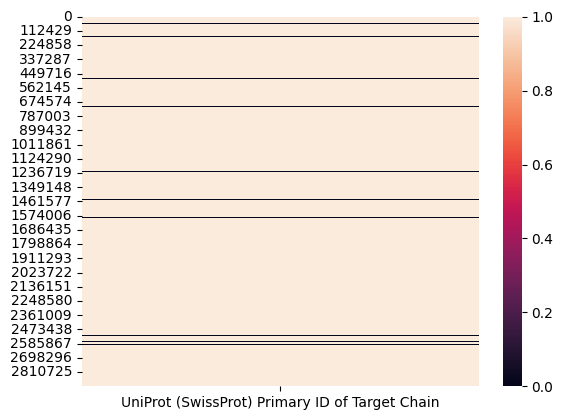

In [110]:
sns.heatmap(df.notna())

In [56]:
df_counts.index[:3]

Index(['P07949', 'O60674', 'P00533'], dtype='object', name='UniProt (SwissProt) Primary ID of Target Chain')

In [70]:
import requests
import tqdm
from tqdm.notebook import tqdm_notebook


diseases = [
    [
        comment.get("disease", {}).get("diseaseId")
        for comment in requests.get(f"https://www.uniprot.org/uniprotkb/{id}.json")
        .json()
        .get("comments", [])
        if comment["commentType"] == "DISEASE"
        if comment.get("disease") is not None
    ]
    for id in tqdm_notebook(df_counts.index)
]


# for id in tqdm.tqdm(df_counts.index):
#     r = requests.get(f"https://www.uniprot.org/uniprotkb/{id}.json")
#     r.json().get('comments')
#     for comment in r.json().get('comments'):
#         if comment['commentType'] == 'DISEASE':
#             diseaseID = comment.get('disease', {}).get('diseaseId')
#             if diseaseID is not None:
#                 print(diseaseID)

  0%|          | 0/6532 [00:00<?, ?it/s]

  0%|          | 17/6532 [00:56<6:00:04,  3.32s/it]


In [71]:
# 1677

In [88]:
nb_empty = 0
for i, disease in enumerate(diseases):
    if disease == []:
        nb_empty += 1
        print(df_counts.index[i])

P14416
P56817
Q13547
P24941
O43614
P34972
P00915
P35372
Q07820
Q99572
O43613
P49841
Q92918
P29274
P41145
P56373
P0DTD1
P28223
P22303
P27338
Q16539
P04585
P41143
P0DMS8
O42275
O75116
Q9NR96
P21453
P30542
P61169
Q16790
P35354
P31645
P11309
P35414
O14744
P10635
P10415
P29275
P14902
P09874
P43490
Q8NER1
P27487
P19327
P28335
Q9Y5N1
Q07343
P50406
P11712
P23977
P18031
P81908
P31652
Q9NZQ7
P33535
P42338
P41594
Q07869
P30530
Q99705
P34969
O14965
Q9Y5Y4
P25099
Q99685
Q9P1W9
P03956
P22455
P06493
Q13822
P38532
O00763
P14842
O60563
O15379
P11229
P21917
P05177
P09917
Q14416
Q92769
Q96GD4
Q99500
P30543
Q13464
P25774
P41146
P23219
P06401
P25103
O14842
Q01064
P55055
P33261
P34913
P25090
P07550
P35408
P31424
Q9Y5Z0
P05979
Q07817
Q60492
P07711
Q64663
P43220
P23743
P41144
P21728
P33533
P13612
Q86V86
O00519
P41595
Q03181
P07900
P20272
O35433
P08173
Q05397
O76074
P35348
P24387
Q99683
O14684
P97612
Q06418
Q7Z3E1
Q14164
P10980
Q923Y8
P31153
Q9H3N8
P10520
P21462
P35367
P13945
P56718
C7C422
P43116
Q9HBH9
P53350

In [87]:
nb_empty / df_counts.shape[0] * 100

80.28169014084507

In [79]:
diseases[1677]

[]

In [81]:
df_counts.index[1677]

'P05227'

In [83]:
r = requests.get(f"https://www.uniprot.org/uniprotkb/P05227.json")
r.json()

{'entryType': 'UniProtKB reviewed (Swiss-Prot)',
 'primaryAccession': 'P05227',
 'uniProtkbId': 'HRP1_PLAFA',
 'entryAudit': {'firstPublicDate': '1987-08-13',
  'lastAnnotationUpdateDate': '2022-05-25',
  'lastSequenceUpdateDate': '1987-08-13',
  'entryVersion': 66,
  'sequenceVersion': 1},
 'annotationScore': 1.0,
 'organism': {'scientificName': 'Plasmodium falciparum',
  'taxonId': 5833,
  'lineage': ['Eukaryota',
   'Sar',
   'Alveolata',
   'Apicomplexa',
   'Aconoidasida',
   'Haemosporida',
   'Plasmodiidae',
   'Plasmodium',
   'Plasmodium (Laverania)']},
 'proteinExistence': '2: Evidence at transcript level',
 'proteinDescription': {'recommendedName': {'fullName': {'value': 'Histidine-rich protein PFHRP-II'}},
  'flag': 'Precursor'},
 'features': [{'type': 'Signal',
   'location': {'start': {'value': 1, 'modifier': 'EXACT'},
    'end': {'value': 21, 'modifier': 'EXACT'}},
   'description': '',
   'evidences': [{'evidenceCode': 'ECO:0000255'}]},
  {'type': 'Chain',
   'location'

In [54]:
for comment in r.json().get("comments"):
    if comment["commentType"] == "DISEASE":
        diseaseID = comment.get("disease", {}).get("diseaseId")
        if diseaseID is not None:
            print(diseaseID)

Pfeiffer syndrome
Hypogonadotropic hypogonadism 2 with or without anosmia
Osteoglophonic dysplasia
Hartsfield syndrome
Trigonocephaly 1
Encephalocraniocutaneous lipomatosis
Jackson-Weiss syndrome


<Axes: xlabel='dis', ylabel='count'>

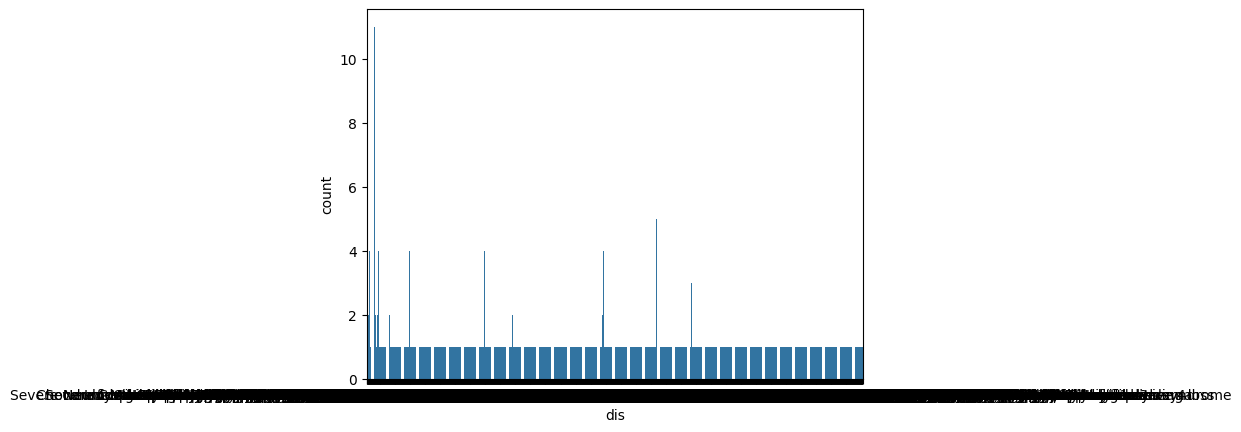

In [99]:
from collections import Counter
from itertools import chain

sns.countplot(pd.DataFrame(chain.from_iterable(diseases), columns=["dis"]), x="dis")

<Axes: xlabel='count', ylabel='dis'>

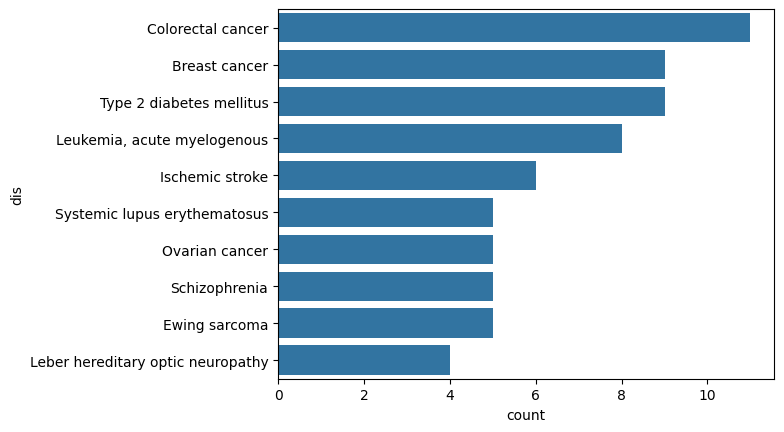

In [108]:
df_2 = (
    pd.DataFrame(chain.from_iterable(diseases), columns=["dis"])
    .value_counts()
    .reset_index()
)

sns.barplot(df_2, y="dis", x="count", order=df_2["dis"][:10])

In [106]:
df_2["dis"][:10]

0                    Colorectal cancer
1                        Breast cancer
2             Type 2 diabetes mellitus
3          Leukemia, acute myelogenous
4                      Ischemic stroke
5         Systemic lupus erythematosus
6                       Ovarian cancer
7                        Schizophrenia
8                        Ewing sarcoma
9    Leber hereditary optic neuropathy
Name: dis, dtype: object